Decision Tree Classifier on Iris Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [4]:
#Imoprt data from the library
iris = load_iris()

In [5]:
# Initiate a decision tree model (criterion: entrophy)
dt = DecisionTreeClassifier(criterion='entropy')

In [6]:
# Split the train and test data (train:67%, test:33%)
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=21)

In [7]:
# Percentage distribution in target column
print("Percentage distribution of target in original data")
unique_targets, count = np.unique(iris.target, return_counts=True)
percent = count / len(iris.target) * 100
for target, percent in zip(unique_targets, percent):
    print(f"{iris.target_names[target]}:{percent:.2f}%")

print("\nPercentage distribution of target in train data")
unique_targets, count = np.unique(Y_train, return_counts=True)
percent = count / len(Y_train) * 100
for target, percent in zip(unique_targets, percent):
    print(f"{iris.target_names[target]}:{percent:.2f}%")
    
print("\nPercentage distribution of target in test data")
unique_targets, count = np.unique(Y_test, return_counts=True)
percent = count / len(Y_test) * 100
for target, percent in zip(unique_targets, percent):
    print(f"{iris.target_names[target]}:{percent:.2f}%")

Percentage distribution of target in original data
setosa:33.33%
versicolor:33.33%
virginica:33.33%

Percentage distribution of target in train data
setosa:32.00%
versicolor:33.00%
virginica:35.00%

Percentage distribution of target in test data
setosa:36.00%
versicolor:34.00%
virginica:30.00%


In [8]:
# Train the decision tree
dt = dt.fit(X_train, Y_train)

In [9]:
# Predict on test dataset
Y_predict = dt.predict(X_test)

In [10]:
# Display the test and predicted data
print("Ground truth of test data\n",Y_test)
print("\nPredicted Data\n",Y_predict)

Ground truth of test data
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 1 1 0 1 0 0 1 2 0 2 1 0 2 1 1
 2 0 2 2 2 2 1 2 0 0 0 1 0]

Predicted Data
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 2 0 2 1 1
 2 0 2 2 2 2 1 2 0 0 0 1 0]


In [11]:
# Calculate Confusion matrix
cm = confusion_matrix(Y_test,Y_predict)

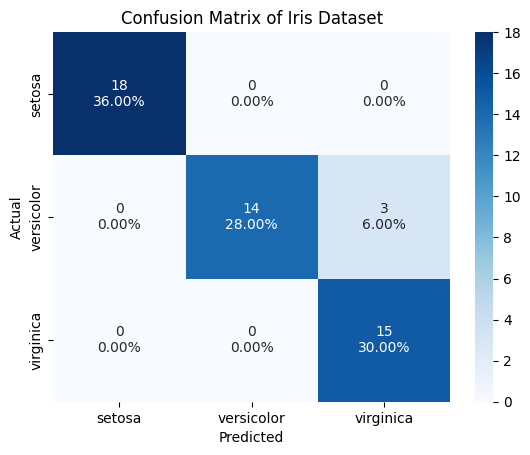

In [15]:
# Visualize confusion matrix

# Create custom level with count and percentage
count = ["{0:.0f}".format(value) for value in cm.flatten()]
percent = ["{0:0.2f}%".format(value*100) for value in cm.flatten()/np.sum(cm)]
labels = [f"{x1}\n{x2}" for x1, x2 in zip(count,percent)]
labels = np.asarray(labels).reshape(3,3)

# Define tick label
tick_label = ['setosa','versicolor','virginica']
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=tick_label, yticklabels=tick_label)

plt.title('Confusion Matrix of Iris Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Generate classification report
report = classification_report(Y_test,Y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



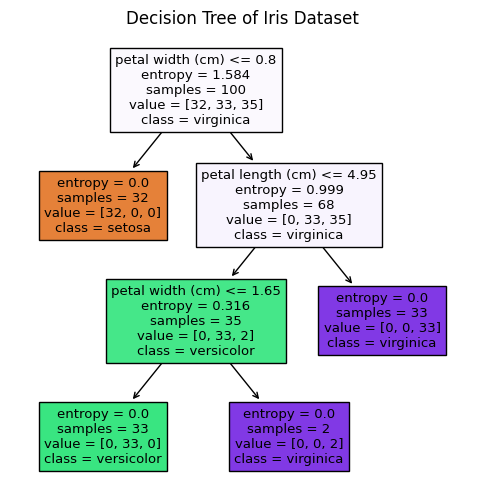

In [16]:
# Plot the decision tree
plt.figure(figsize=(6,6))
tree.plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree of Iris Dataset')
plt.show()